In [22]:
import tushare as ts
import numpy as np
import pandas as pd
import os
import jqdatasdk     # JoinQuant SDK
import datetime
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
train_300 = pd.read_csv(os.getcwd() + '/train.csv', index_col=0)
# train_300['datetime'] = pd.to_datetime(train_300.datetime)
# train_300.set_index(train_300.datetime, inplace=True)
train_300

,datetime,open,high,low,close,volume,money
0,2013-01-14,2551.81,2583.63,2473.70,2577.72,5.541036e+10,5.602669e+11
1,2013-01-23,2579.13,2620.03,2539.67,2607.46,6.056519e+10,6.064508e+11
2,2013-02-01,2606.43,2744.32,2564.21,2743.32,6.625742e+10,6.831217e+11
3,2013-02-19,2753.69,2791.30,2674.34,2685.61,6.513217e+10,6.801547e+11
4,2013-02-28,2686.09,2703.10,2564.67,2673.33,5.141966e+10,5.389911e+11
...,...,...,...,...,...,...,...
169,2017-11-24,4063.49,4260.64,4057.49,4104.20,1.126449e+11,1.545622e+12
170,2017-12-05,4088.93,4088.93,3982.32,4040.17,8.321716e+10,1.100689e+12
171,2017-12-14,4027.12,4070.15,3955.44,4026.15,6.286258e+10,8.902225e+11
172,2017-12-25,4018.73,4086.93,3967.93,4041.54,5.972680e+10,8.451944e+11


In [3]:
df_train = train_300
df_train['datetime'] = pd.to_datetime(df_train['datetime'])
df_train.set_index(df_train['datetime'], inplace=True)
df_train.rename(columns={'datetime':'None'}, inplace=True)
df1 = df_train.drop(columns=['None'])
df1 # refers to train dataframe

,open,high,low,close,volume,money
datetime,,,,,,
2013-01-14,2551.81,2583.63,2473.70,2577.72,5.541036e+10,5.602669e+11
2013-01-23,2579.13,2620.03,2539.67,2607.46,6.056519e+10,6.064508e+11
2013-02-01,2606.43,2744.32,2564.21,2743.32,6.625742e+10,6.831217e+11
2013-02-19,2753.69,2791.30,2674.34,2685.61,6.513217e+10,6.801547e+11
2013-02-28,2686.09,2703.10,2564.67,2673.33,5.141966e+10,5.389911e+11
...,...,...,...,...,...,...
2017-11-24,4063.49,4260.64,4057.49,4104.20,1.126449e+11,1.545622e+12
2017-12-05,4088.93,4088.93,3982.32,4040.17,8.321716e+10,1.100689e+12
2017-12-14,4027.12,4070.15,3955.44,4026.15,6.286258e+10,8.902225e+11


In [4]:
test_300 = pd.read_csv(os.getcwd() + '/test.csv', index_col=0)
# train_300['datetime'] = pd.to_datetime(train_300.datetime)
# train_300.set_index(train_300.datetime, inplace=True)
test_300

,datetime,open,high,low,close,volume,money
0,2013-01-14,2551.81,2583.63,2473.70,2577.72,5.541036e+10,5.602669e+11
1,2013-01-23,2579.13,2620.03,2539.67,2607.46,6.056519e+10,6.064508e+11
2,2013-02-01,2606.43,2744.32,2564.21,2743.32,6.625742e+10,6.831217e+11
3,2013-02-19,2753.69,2791.30,2674.34,2685.61,6.513217e+10,6.801547e+11
4,2013-02-28,2686.09,2703.10,2564.67,2673.33,5.141966e+10,5.389911e+11
...,...,...,...,...,...,...,...
169,2017-11-24,4063.49,4260.64,4057.49,4104.20,1.126449e+11,1.545622e+12
170,2017-12-05,4088.93,4088.93,3982.32,4040.17,8.321716e+10,1.100689e+12
171,2017-12-14,4027.12,4070.15,3955.44,4026.15,6.286258e+10,8.902225e+11
172,2017-12-25,4018.73,4086.93,3967.93,4041.54,5.972680e+10,8.451944e+11


In [5]:
df_test = test_300
df_test['datetime'] = pd.to_datetime(df_test['datetime'])
df_test.set_index(df_test['datetime'], inplace=True)
df_test.rename(columns={'datetime':'None'}, inplace=True)
df2 = df_test.drop(columns=['None'])
df2 # refers to test dataframe

,open,high,low,close,volume,money
datetime,,,,,,
2013-01-14,2551.81,2583.63,2473.70,2577.72,5.541036e+10,5.602669e+11
2013-01-23,2579.13,2620.03,2539.67,2607.46,6.056519e+10,6.064508e+11
2013-02-01,2606.43,2744.32,2564.21,2743.32,6.625742e+10,6.831217e+11
2013-02-19,2753.69,2791.30,2674.34,2685.61,6.513217e+10,6.801547e+11
2013-02-28,2686.09,2703.10,2564.67,2673.33,5.141966e+10,5.389911e+11
...,...,...,...,...,...,...
2017-11-24,4063.49,4260.64,4057.49,4104.20,1.126449e+11,1.545622e+12
2017-12-05,4088.93,4088.93,3982.32,4040.17,8.321716e+10,1.100689e+12
2017-12-14,4027.12,4070.15,3955.44,4026.15,6.286258e+10,8.902225e+11


In [6]:
# Train dataset Through the Project, use this DF
df1

,open,high,low,close,volume,money
datetime,,,,,,
2013-01-14,2551.81,2583.63,2473.70,2577.72,5.541036e+10,5.602669e+11
2013-01-23,2579.13,2620.03,2539.67,2607.46,6.056519e+10,6.064508e+11
2013-02-01,2606.43,2744.32,2564.21,2743.32,6.625742e+10,6.831217e+11
2013-02-19,2753.69,2791.30,2674.34,2685.61,6.513217e+10,6.801547e+11
2013-02-28,2686.09,2703.10,2564.67,2673.33,5.141966e+10,5.389911e+11
...,...,...,...,...,...,...
2017-11-24,4063.49,4260.64,4057.49,4104.20,1.126449e+11,1.545622e+12
2017-12-05,4088.93,4088.93,3982.32,4040.17,8.321716e+10,1.100689e+12
2017-12-14,4027.12,4070.15,3955.44,4026.15,6.286258e+10,8.902225e+11


In [7]:
# Test dataset Through the Project, use this DF
df2

,open,high,low,close,volume,money
datetime,,,,,,
2013-01-14,2551.81,2583.63,2473.70,2577.72,5.541036e+10,5.602669e+11
2013-01-23,2579.13,2620.03,2539.67,2607.46,6.056519e+10,6.064508e+11
2013-02-01,2606.43,2744.32,2564.21,2743.32,6.625742e+10,6.831217e+11
2013-02-19,2753.69,2791.30,2674.34,2685.61,6.513217e+10,6.801547e+11
2013-02-28,2686.09,2703.10,2564.67,2673.33,5.141966e+10,5.389911e+11
...,...,...,...,...,...,...
2017-11-24,4063.49,4260.64,4057.49,4104.20,1.126449e+11,1.545622e+12
2017-12-05,4088.93,4088.93,3982.32,4040.17,8.321716e+10,1.100689e+12
2017-12-14,4027.12,4070.15,3955.44,4026.15,6.286258e+10,8.902225e+11


In [8]:
# 重新命名周训练集和测试集方便使用
origin_weekly_train = df1
origin_weekly_test = df2

In [9]:
'''
计算SVM需要的指标 Indicators
indicator 1:     pct_chg 
indicator 2:     pct_chg_pre1   -> pct_chg.shift(1)    -> previous 1 day's percent change
indicator 3:     pct_chg_pre2   -> pct_chg.shift(2)    -> previous 2 days' percent change
indicator 4:     money_ma4
indicator 5:     volume_ma20
indicator 6:     volume_pre1    -> previous 1 day's traded volume 
'''

# indicator column set
indicator_cols = ['high', 'low', 'pct_chg', 'pct_chg_pre1', 'pct_chg_pre2', 'money_ma4', 'money_pre1', 'change']

# Process origin_weekly_train data set
# df1:      origin_weekly_train data set 
# indicator 1:  'pct_chg' for weekly_train data
df1['pct_chg'] = 100 * (df1.close / df1.close.shift(1) - 1)
# indicator 2:  'pct_chg_pre1' based on index1: 'pct_chg'   indicator 2 based on the information of indicator 1 -> shift 1
df1['pct_chg_pre1'] = df1['pct_chg'].shift(1)
# indicator 3:  'pct_chg_pre2' based on index1: 'pct_chg'   indicator 3 based on the information of indicator 1 -> shift 2       
df1['pct_chg_pre2'] = df1['pct_chg'].shift(2)
# indicator 4:  'money_ma4'     -> calculated from 'money' column
df1['money_ma4'] = df1['money'].rolling(4).mean()
# indicator 5:  'amount_ma20'
df1['volume_ma20'] = df1['volume'].rolling(20).mean()
# indicator 6:  'money_pre1'
df1['volume_pre1'] = df1['volume'].shift(1)
# 7:             'change' 
df1['change'] = df1['close'].shift(1) - df1['close']
# 8:             'pre_close'
df1['pre_close'] = df1['close'].shift(1)
# Indicators calculated completed here, indicators all showed in df1
df1

,open,high,low,close,volume,money,pct_chg,pct_chg_pre1,pct_chg_pre2,money_ma4,volume_ma20,volume_pre1,change,pre_close
datetime,,,,,,,,,,,,,,
2013-01-14,2551.81,2583.63,2473.70,2577.72,5.541036e+10,5.602669e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-23,2579.13,2620.03,2539.67,2607.46,6.056519e+10,6.064508e+11,1.153733,NaN,NaN,NaN,NaN,5.541036e+10,-29.74,2577.72
2013-02-01,2606.43,2744.32,2564.21,2743.32,6.625742e+10,6.831217e+11,5.210435,1.153733,NaN,NaN,NaN,6.056519e+10,-135.86,2607.46
2013-02-19,2753.69,2791.30,2674.34,2685.61,6.513217e+10,6.801547e+11,-2.103655,5.210435,1.153733,6.324985e+11,NaN,6.625742e+10,57.71,2743.32
2013-02-28,2686.09,2703.10,2564.67,2673.33,5.141966e+10,5.389911e+11,-0.457252,-2.103655,5.210435,6.271796e+11,NaN,6.513217e+10,12.28,2685.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-24,4063.49,4260.64,4057.49,4104.20,1.126449e+11,1.545622e+12,0.749447,1.312645,0.683848,1.214691e+12,8.090088e+10,9.811368e+10,-30.53,4073.67
2017-12-05,4088.93,4088.93,3982.32,4040.17,8.321716e+10,1.100689e+12,-1.560109,0.749447,1.312645,1.276883e+12,8.151864e+10,1.126449e+11,64.03,4104.20
2017-12-14,4027.12,4070.15,3955.44,4026.15,6.286258e+10,8.902225e+11,-0.347015,-1.560109,0.749447,1.218220e+12,8.138856e+10,8.321716e+10,14.02,4040.17


In [10]:
'''
Signals are calculated in a rolling basis
With SVM used with packages Sklearn
'''
svm_model = Pipeline((("sclaer", StandardScaler()), ("linear_svc", LinearSVC(C=1, loss="hinge")), ))
x_list = ['close','open','high','low','pre_close','change','pct_chg','volume','money']
y_list = 'pct_chg'
n = 20
# 按照pct_chg的列来生成信号
signals = np.empty(shape=df1['pct_chg'].shape)

# for循环滚动生成信号
# 每次拿20+1行数据 copy至temp_copy_data中 使用前20行进行训练 最后一行进行SVM预测
for i in range(len(df1)-n):
    temp_copy_data = df1[1:i+n+1].copy()
    # training
    x_train = temp_copy_data[x_list].values[:-1]
    y_train = temp_copy_data[y_list].values[1:]
    model = svm_model.fit(x_train, (y_train > 0).astype(int))
    # Testing
    x_forecast = temp_copy_data[x_list].values[[-1]]
    y_forecast = model.predict(x_forecast)
    signals[i+n] = y_forecast[0]

# assign signals to dataFrame
df1['signal'] = signals


/Users/lijunyu/opt/anaconda3/envs/LI38/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lijunyu/opt/anaconda3/envs/LI38/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lijunyu/opt/anaconda3/envs/LI38/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lijunyu/opt/anaconda3/envs/LI38/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lijunyu/opt/anaconda3/envs/LI38/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lijunyu/opt/a

In [11]:
# After training, print df to see signals
df1

,open,high,low,close,volume,money,pct_chg,pct_chg_pre1,pct_chg_pre2,money_ma4,volume_ma20,volume_pre1,change,pre_close,signal
datetime,,,,,,,,,,,,,,,
2013-01-14,2551.81,2583.63,2473.70,2577.72,5.541036e+10,5.602669e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
2013-01-23,2579.13,2620.03,2539.67,2607.46,6.056519e+10,6.064508e+11,1.153733,NaN,NaN,NaN,NaN,5.541036e+10,-29.74,2577.72,6.175821e-322
2013-02-01,2606.43,2744.32,2564.21,2743.32,6.625742e+10,6.831217e+11,5.210435,1.153733,NaN,NaN,NaN,6.056519e+10,-135.86,2607.46,0.000000e+00
2013-02-19,2753.69,2791.30,2674.34,2685.61,6.513217e+10,6.801547e+11,-2.103655,5.210435,1.153733,6.324985e+11,NaN,6.625742e+10,57.71,2743.32,6.947819e-310
2013-02-28,2686.09,2703.10,2564.67,2673.33,5.141966e+10,5.389911e+11,-0.457252,-2.103655,5.210435,6.271796e+11,NaN,6.513217e+10,12.28,2685.61,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-24,4063.49,4260.64,4057.49,4104.20,1.126449e+11,1.545622e+12,0.749447,1.312645,0.683848,1.214691e+12,8.090088e+10,9.811368e+10,-30.53,4073.67,1.000000e+00
2017-12-05,4088.93,4088.93,3982.32,4040.17,8.321716e+10,1.100689e+12,-1.560109,0.749447,1.312645,1.276883e+12,8.151864e+10,1.126449e+11,64.03,4104.20,1.000000e+00
2017-12-14,4027.12,4070.15,3955.44,4026.15,6.286258e+10,8.902225e+11,-0.347015,-1.560109,0.749447,1.218220e+12,8.138856e+10,8.321716e+10,14.02,4040.17,1.000000e+00


In [13]:
# '''
# Calculate positions
# '''
# # 出现信号 隔天操作
# df1['position'] = df1['signal'].fillna(method='ffill').shift(1).fillna(0)
# df1
# a = df1[(df1.position!=0) or (df1.position!=1)]


In [14]:
'''
仓位position计算
'''
a = df1[(df1['position']!=0)]
b = df1[(df1['position']!=1)]
df1['position'].astype(int)
df1['position_2'] = df1['position'].astype(int)
# position计算加载完毕
df1

,open,high,low,close,volume,money,pct_chg,pct_chg_pre1,pct_chg_pre2,money_ma4,volume_ma20,volume_pre1,change,pre_close,signal,position,position_2
datetime,,,,,,,,,,,,,,,,,
2013-01-14,2551.81,2583.63,2473.70,2577.72,5.541036e+10,5.602669e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0
2013-01-23,2579.13,2620.03,2539.67,2607.46,6.056519e+10,6.064508e+11,1.153733,NaN,NaN,NaN,NaN,5.541036e+10,-29.74,2577.72,6.175821e-322,0.000000e+00,0
2013-02-01,2606.43,2744.32,2564.21,2743.32,6.625742e+10,6.831217e+11,5.210435,1.153733,NaN,NaN,NaN,6.056519e+10,-135.86,2607.46,0.000000e+00,6.175821e-322,0
2013-02-19,2753.69,2791.30,2674.34,2685.61,6.513217e+10,6.801547e+11,-2.103655,5.210435,1.153733,6.324985e+11,NaN,6.625742e+10,57.71,2743.32,6.947819e-310,0.000000e+00,0
2013-02-28,2686.09,2703.10,2564.67,2673.33,5.141966e+10,5.389911e+11,-0.457252,-2.103655,5.210435,6.271796e+11,NaN,6.513217e+10,12.28,2685.61,0.000000e+00,6.947819e-310,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-24,4063.49,4260.64,4057.49,4104.20,1.126449e+11,1.545622e+12,0.749447,1.312645,0.683848,1.214691e+12,8.090088e+10,9.811368e+10,-30.53,4073.67,1.000000e+00,1.000000e+00,1
2017-12-05,4088.93,4088.93,3982.32,4040.17,8.321716e+10,1.100689e+12,-1.560109,0.749447,1.312645,1.276883e+12,8.151864e+10,1.126449e+11,64.03,4104.20,1.000000e+00,1.000000e+00,1
2017-12-14,4027.12,4070.15,3955.44,4026.15,6.286258e+10,8.902225e+11,-0.347015,-1.560109,0.749447,1.218220e+12,8.138856e+10,8.321716e+10,14.02,4040.17,1.000000e+00,1.000000e+00,1


In [15]:
'''
Performance Calculation
'''
position = df1['position_2']                                                    # position
# ------------------------------------------------------------------------------------------------------
hold_r = df1['pct_chg'] / 100 * position                                        # 持仓收益 holding return
hold_win = hold_r > 0                                                           # 持仓胜率
hold_cum_r = (1 + hold_r).cumprod() - 1                                         # 持仓净值curve
drawback = (hold_cum_r.cummax() - hold_cum_r) / (1 + hold_cum_r).cummax()       # 回撤 drawback
ex_hold_ret = hold_r - 0.03 / 250                                               # 超额收益 rf = 3%
# ------------------------------------------------------------------------------------------------------
df1['hold_r'] = hold_r
df1['hold_win'] = hold_win
df1['hold_cum_r'] = hold_cum_r
df1['drawback'] = drawback
df1['ex_hold_ret'] = ex_hold_ret
# ------------------------------------------------------------------------------------------------------
v_hold_cumu_r = hold_cum_r.tolist()[-1]

v_pos_hold_times= 0 
v_neg_hold_times= 0 
v_pos_hold_win_times = 0
v_neg_hold_win_times = 0
v_pos_hold_period = 0
v_neg_hold_period = 0
v_pos_hold_win_period = 0
v_neg_hold_win_period = 0
for w, r, pre_pos, pos in zip(hold_win, hold_r, position.shift(1), position):
    # 有换仓（先结算上一次持仓，再初始化本次持仓）
    if pre_pos!=pos: 
        # 判断pre_pos非空：若为空则是循环的第一次，此时无需结算，直接初始化持仓即可
        if pre_pos == pre_pos:
            # 结算上一次持仓
            if pre_pos>0:
                v_pos_hold_times += 1
                v_pos_hold_period += tmp_hold_period
                v_pos_hold_win_period += tmp_hold_win_period
                if tmp_hold_r>0:
                    v_pos_hold_win_times+=1
            elif pre_pos<0:
                v_neg_hold_times += 1      
                v_neg_hold_period += tmp_hold_period
                v_neg_hold_win_period += tmp_hold_win_period
                if tmp_hold_r>0:                    
                    v_neg_hold_win_times+=1
            # 初始化本次持仓
        tmp_hold_r = r
        tmp_hold_period = 0
        tmp_hold_win_period = 0
    else: # 未换仓
        if abs(pos)>0:
            tmp_hold_period += 1
            if r>0:
                tmp_hold_win_period += 1
            if abs(r)>0:
                tmp_hold_r = (1+tmp_hold_r)*(1+r)-1       
#最后一次持仓未结束，不纳入统计

# 日胜率【持仓天数，持仓收益天数】    
#v_hold_period = v_pos_hold_period + v_neg_hold_period
#v_hold_win_period = v_pos_hold_win_period + v_neg_hold_win_period
v_hold_period = (abs(position)>0).sum()
v_hold_win_period = (hold_r>0).sum()

# 最大回撤
v_max_dd = drawback.max()    
# 年化收益
v_annual_ret=pow(1+v_hold_cumu_r, 250/len(df1))-1
# 年化标准差
    
#年化夏普
v_sharpe=np.sqrt(len(ex_hold_ret))*ex_hold_ret.mean()/ex_hold_ret.std()    
    
performance_cols = ['累计收益', 
                    '多仓次数', '多仓胜率', '多仓平均持有期', 
               
                    '日胜率', '最大回撤', '年化收益/最大回撤',
                    '年化收益',  '年化夏普']
performance_values = [v_hold_cumu_r,
                          v_pos_hold_times, 
                              0 if v_pos_hold_times==0 else v_pos_hold_win_times/v_pos_hold_times, 
                              0 if v_pos_hold_times==0 else v_pos_hold_period/v_pos_hold_times,
                     
                          v_hold_win_period/v_hold_period, v_max_dd, v_annual_ret/v_max_dd,
                          v_annual_ret, v_sharpe
                         ]
performance_df = pd.DataFrame(performance_values, index=performance_cols)


In [16]:
performance_df

,0
累计收益,0.697402
多仓次数,15.000000
多仓胜率,0.800000
多仓平均持有期,3.000000
日胜率,0.605263
最大回撤,0.267013
年化收益/最大回撤,4.264599
年化收益,1.138703
年化夏普,1.597226


In [17]:
df1

,open,high,low,close,volume,money,pct_chg,pct_chg_pre1,pct_chg_pre2,money_ma4,...,change,pre_close,signal,position,position_2,hold_r,hold_win,hold_cum_r,drawback,ex_hold_ret
datetime,,,,,,,,,,,,,,,,,,,,,
2013-01-14,2551.81,2583.63,2473.70,2577.72,5.541036e+10,5.602669e+11,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000e+00,0.000000e+00,0,NaN,False,NaN,NaN,NaN
2013-01-23,2579.13,2620.03,2539.67,2607.46,6.056519e+10,6.064508e+11,1.153733,NaN,NaN,NaN,...,-29.74,2577.72,6.175821e-322,0.000000e+00,0,0.000000,False,0.000000,0.000000,-0.000120
2013-02-01,2606.43,2744.32,2564.21,2743.32,6.625742e+10,6.831217e+11,5.210435,1.153733,NaN,NaN,...,-135.86,2607.46,0.000000e+00,6.175821e-322,0,0.000000,False,0.000000,0.000000,-0.000120
2013-02-19,2753.69,2791.30,2674.34,2685.61,6.513217e+10,6.801547e+11,-2.103655,5.210435,1.153733,6.324985e+11,...,57.71,2743.32,6.947819e-310,0.000000e+00,0,-0.000000,False,0.000000,0.000000,-0.000120
2013-02-28,2686.09,2703.10,2564.67,2673.33,5.141966e+10,5.389911e+11,-0.457252,-2.103655,5.210435,6.271796e+11,...,12.28,2685.61,0.000000e+00,6.947819e-310,0,-0.000000,False,0.000000,0.000000,-0.000120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-24,4063.49,4260.64,4057.49,4104.20,1.126449e+11,1.545622e+12,0.749447,1.312645,0.683848,1.214691e+12,...,-30.53,4073.67,1.000000e+00,1.000000e+00,1,0.007494,True,0.728290,0.089619,0.007374
2017-12-05,4088.93,4088.93,3982.32,4040.17,8.321716e+10,1.100689e+12,-1.560109,0.749447,1.312645,1.276883e+12,...,64.03,4104.20,1.000000e+00,1.000000e+00,1,-0.015601,False,0.701326,0.103822,-0.015721
2017-12-14,4027.12,4070.15,3955.44,4026.15,6.286258e+10,8.902225e+11,-0.347015,-1.560109,0.749447,1.218220e+12,...,14.02,4040.17,1.000000e+00,1.000000e+00,1,-0.003470,False,0.695423,0.106932,-0.003590


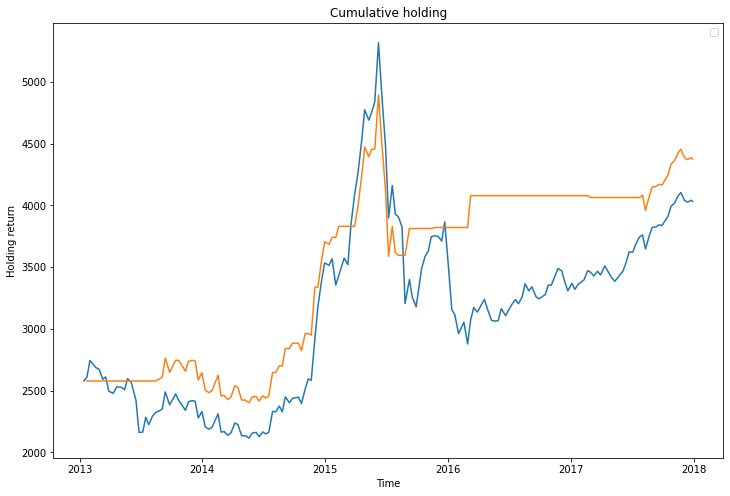

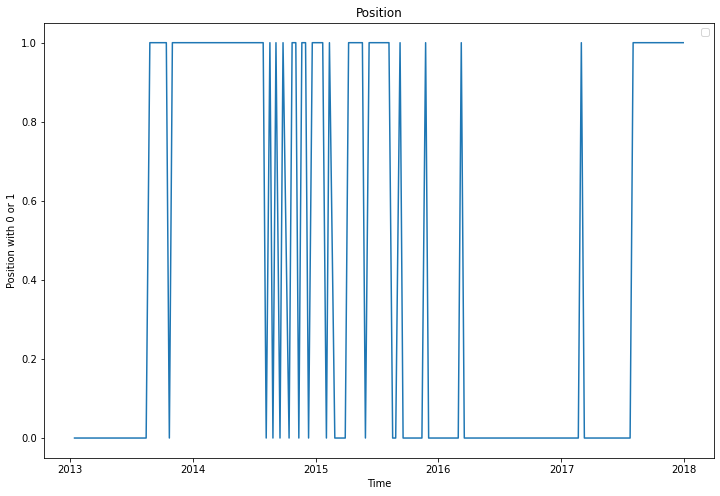

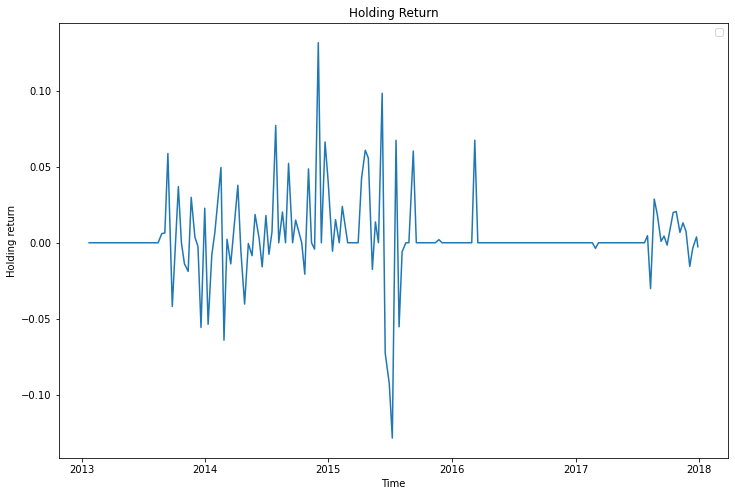

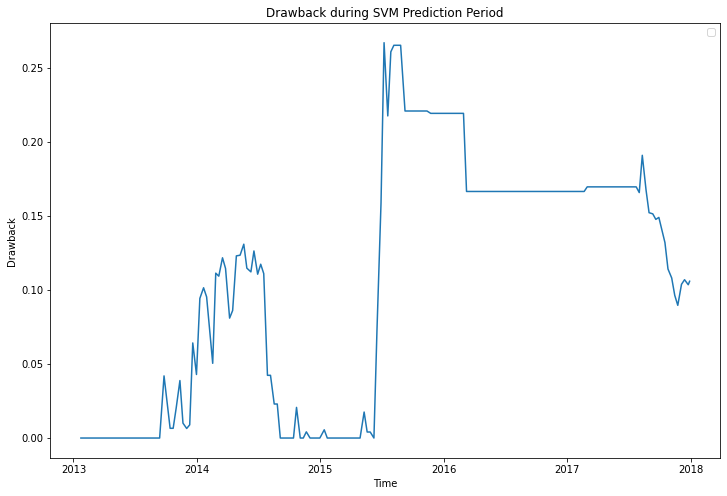

In [40]:
'''
可视化结果
'''
# 总体行情
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,1,1) 
ax1.plot(df1.index, df1['close'])
ax1.plot(df1.index, (df1['hold_cum_r']+1) * df1['close'].tolist()[0])
ax1.set_title("Cumulative holding")
ax1.set_xlabel("Time")
ax1.set_ylabel("Holding return")
ax1.legend()

# 仓位position
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,1,1) 
ax1.plot(df1.index, df1['position_2'])
ax1.set_title("Position")
ax1.set_xlabel("Time")
ax1.set_ylabel("Position with 0 or 1")
ax1.legend()

# 收益
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,1,1) 
ax1.plot(df1.index, df1['hold_r'])
ax1.set_title("Holding Return")
ax1.set_xlabel("Time")
ax1.set_ylabel("Holding return")
ax1.legend()

# Drawback
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,1,1) 
ax1.plot(df1.index, df1['drawback'])
ax1.set_title("Drawback during SVM Prediction Period")
ax1.set_xlabel("Time")
ax1.set_ylabel("Drawback")
ax1.legend()
